In [1]:
import re
import matplotlib.pyplot as plt

In [4]:
# Log-Datei einlesen
#log_file = "few_shot_vitb16_32_2/training_3/log_rank0.txt"
def get_plots(log_file):
    tot_loss = []
    acc_values = {"Acc@1": [], "Acc@5": [], "Acc@10": [], "Acc@50": []}

    with open(log_file, "r") as file:
        for line in file:
            # tot_loss extrahieren
            loss_match = re.search(r"tot_loss ([0-9]+\.[0-9]+)", line)
            if loss_match:
                tot_loss.append(float(loss_match.group(1)))

            # Acc@1, 5, 10, 50 extrahieren
            #if log_file=="few_shot_vitb32_128_2/log_rank0.txt":
            acc_match = re.search(r"\* Acc@1 ([0-9]+\.[0-9]+) Acc@5 ([0-9]+\.[0-9]+)", line)
            #else:
            #    acc_match = re.search(r"\* Acc@1 ([0-9]+\.[0-9]+) Acc@5 ([0-9]+\.[0-9]+) Acc@10 ([0-9]+\.[0-9]+) Acc@50 ([0-9]+\.[0-9]+)", line)
            if acc_match:
                acc_values["Acc@1"].append(float(acc_match.group(1)))
                acc_values["Acc@5"].append(float(acc_match.group(2)))
                #if not log_file=="few_shot_vitb32_128_2/log_rank0.txt":
                    #acc_values["Acc@10"].append(float(acc_match.group(3)))
                    #acc_values["Acc@50"].append(float(acc_match.group(4)))

    # Plotten
    epochs = range(len(acc_values["Acc@1"]))  # Annahme: Acc-Werte pro Epoche
    plt.figure(figsize=(12, 6))

    # tot_loss plotten
    plt.subplot(1, 2, 1)
    plt.plot(range(len(tot_loss)), tot_loss, label="tot_loss", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    # Acc-Werte plotten
    plt.subplot(1, 2, 2)
    for key, values in acc_values.items():
        plt.plot(epochs, values, label=key)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Test Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

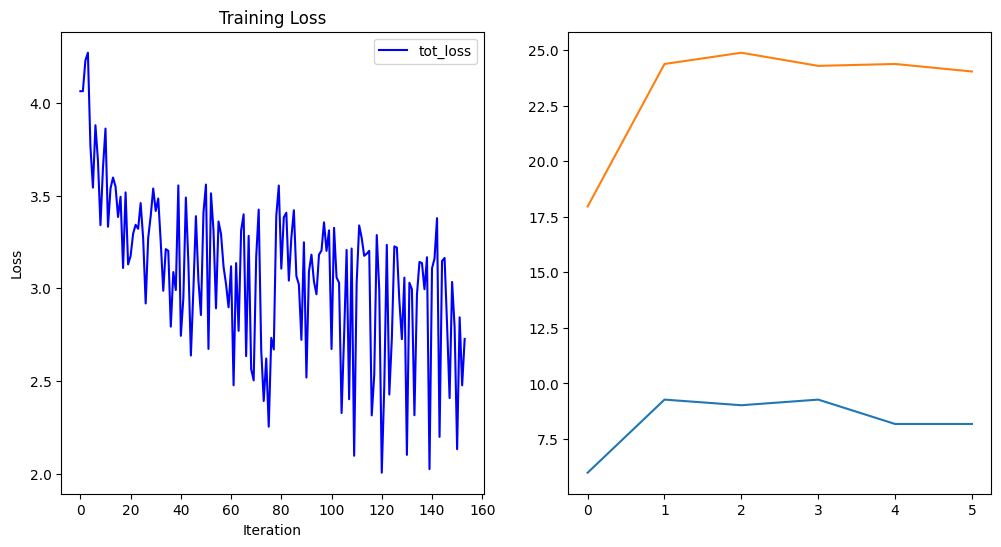

In [5]:
get_plots("few_shot/vitb16_2_frames/humanedit/log_rank0.txt")
    #"few_shot_vitb16_32_2/training_3/log_rank0.txt")

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

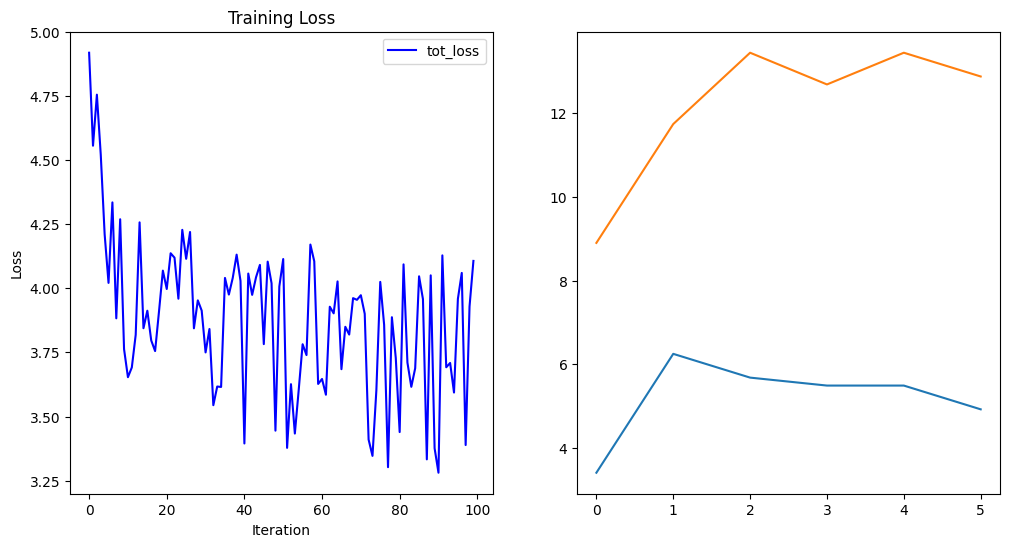

In [4]:
get_plots("few_shot_vitb32_128_2/log_rank0.txt")

In [1]:
# plot metrics with both losses

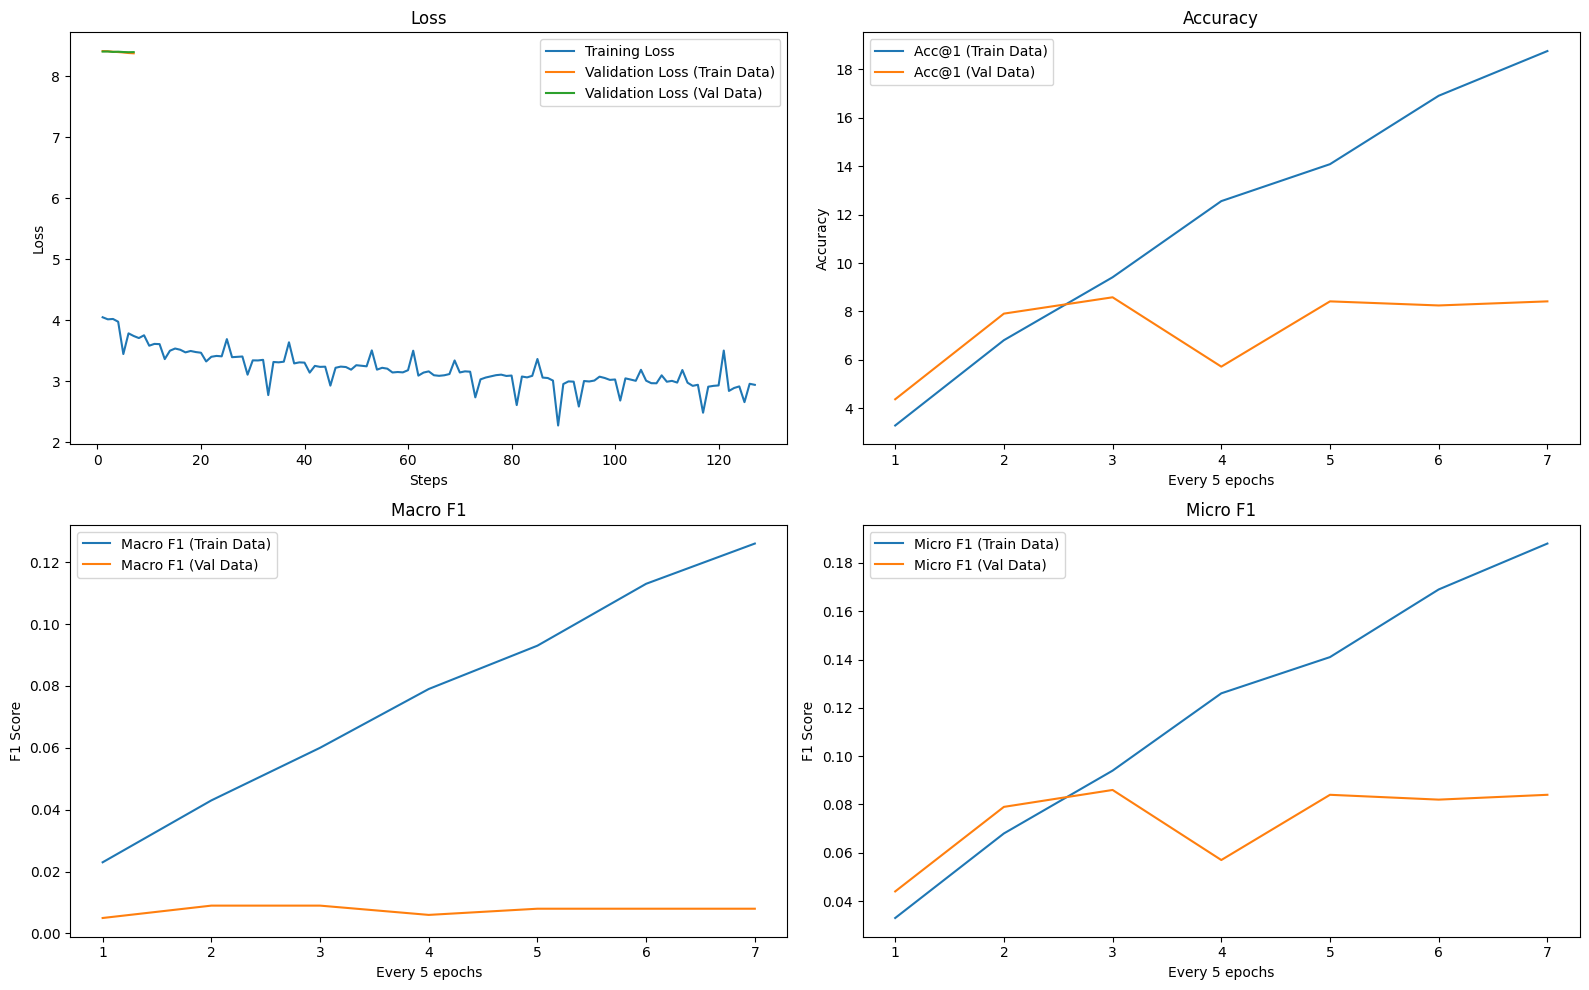

In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Pfad zur Log-Datei
log_file_path = "few_shot/vitb16_2_frames/humanedit/test/log_rank0.txt"

# Datenstrukturen zum Speichern der extrahierten Daten
train_loss = []
val_loss_train = []
val_loss_val = []

metrics_train = {"Acc@1": [], "Macro_P": [], "Macro_R": [], "Macro_F1": [], "Micro_P": [], "Micro_R": [], "Micro_F1": []}
metrics_val = {"Acc@1": [], "Macro_P": [], "Macro_R": [], "Macro_F1": [], "Micro_P": [], "Micro_R": [], "Micro_F1": []}

# Reguläre Ausdrücke für die gewünschten Werte
train_loss_pattern = r"tot_loss.*\(([\d.]+)\)"
val_loss_pattern = r"Validation Loss: ([\d.]+)"
acc_pattern = r"Acc@1: ([\d.]+)"
macro_metrics_pattern = r"Macro P: ([\d.]+), R: ([\d.]+), F1: ([\d.]+)"
micro_metrics_pattern = r"Micro P: ([\d.]+), R: ([\d.]+), F1: ([\d.]+)"
train_data_flag = "Validate model using TRAINING DATA"
val_data_flag = "Validate model using VAL DATA"

# Hilfsvariablen
current_context = None

# Datei parsen
with open(log_file_path, "r") as file:
    for line in file:
        # Trainingsverlust extrahieren
        train_loss_match = re.search(train_loss_pattern, line)
        if train_loss_match:
            train_loss.append(float(train_loss_match.group(1)))
        
        # Kontext wechseln (Training/Validation)
        if train_data_flag in line:
            current_context = "train"
        elif val_data_flag in line:
            current_context = "val"
        
        # Validierungsverlust extrahieren
        val_loss_match = re.search(val_loss_pattern, line)
        if val_loss_match:
            if current_context == "train":
                val_loss_train.append(float(val_loss_match.group(1)))
            elif current_context == "val":
                val_loss_val.append(float(val_loss_match.group(1)))
        
        # Metriken extrahieren
        acc_match = re.search(acc_pattern, line)
        macro_metrics_match = re.search(macro_metrics_pattern, line)
        micro_metrics_match = re.search(micro_metrics_pattern, line)
        
        if acc_match:
            if current_context == "train":
                metrics_train["Acc@1"].append(float(acc_match.group(1)))
            elif current_context == "val":
                metrics_val["Acc@1"].append(float(acc_match.group(1)))
        
        if macro_metrics_match:
            metrics = [float(m) for m in macro_metrics_match.groups()]
            if current_context == "train":
                metrics_train["Macro_P"].append(metrics[0])
                metrics_train["Macro_R"].append(metrics[1])
                metrics_train["Macro_F1"].append(metrics[2])
            elif current_context == "val":
                metrics_val["Macro_P"].append(metrics[0])
                metrics_val["Macro_R"].append(metrics[1])
                metrics_val["Macro_F1"].append(metrics[2])
        
        if micro_metrics_match:
            metrics = [float(m) for m in micro_metrics_match.groups()]
            if current_context == "train":
                metrics_train["Micro_P"].append(metrics[0])
                metrics_train["Micro_R"].append(metrics[1])
                metrics_train["Micro_F1"].append(metrics[2])
            elif current_context == "val":
                metrics_val["Micro_P"].append(metrics[0])
                metrics_val["Micro_R"].append(metrics[1])
                metrics_val["Micro_F1"].append(metrics[2])

# Daten visualisieren
epochs = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(16, 10))

# Verlust
plt.subplot(2, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
plt.plot(range(1, len(val_loss_train) + 1), val_loss_train, label="Validation Loss (Train Data)")
plt.plot(range(1, len(val_loss_val) + 1), val_loss_val, label="Validation Loss (Val Data)")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()

# Genauigkeit
plt.subplot(2, 2, 2)
plt.plot(range(1, len(metrics_train["Acc@1"]) + 1), metrics_train["Acc@1"], label="Acc@1 (Train Data)")
plt.plot(range(1, len(metrics_val["Acc@1"]) + 1), metrics_val["Acc@1"], label="Acc@1 (Val Data)")
plt.xlabel("Every 5 epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

# Macro F1-Score
plt.subplot(2, 2, 3)
plt.plot(range(1, len(metrics_train["Macro_F1"]) + 1), metrics_train["Macro_F1"], label="Macro F1 (Train Data)")
plt.plot(range(1, len(metrics_val["Macro_F1"]) + 1), metrics_val["Macro_F1"], label="Macro F1 (Val Data)")
plt.xlabel("Every 5 epochs")
plt.ylabel("F1 Score")
plt.title("Macro F1")
plt.legend()

# Micro F1-Score
plt.subplot(2, 2, 4)
plt.plot(range(1, len(metrics_train["Micro_F1"]) + 1), metrics_train["Micro_F1"], label="Micro F1 (Train Data)")
plt.plot(range(1, len(metrics_val["Micro_F1"]) + 1), metrics_val["Micro_F1"], label="Micro F1 (Val Data)")
plt.xlabel("Every 5 epochs")
plt.ylabel("F1 Score")
plt.title("Micro F1")
plt.legend()

plt.tight_layout()
plt.show()
